## Checkee.info Data Analysis
Some very simple data analysis of the scraped data from [Checkee.info](http://checkee.info/).

I am also using this data set to practice how to use the Pandas library in Python 3.

*Note that due to the limitations of the dataset, the results are not likely to be reliable and can only be used as an overview.*

In [17]:
# Make sure plots are inline
%matplotlib inline

# xlrd to read .xlsx sheet data
import xlrd
from xlrd.xldate import xldate_as_datetime

# Import Pandas library
import pandas as pd

# Import matplotlib
import matplotlib.pyplot as plt

In [4]:
# Read scraped datasheet
workbook = xlrd.open_workbook('VISA-Data-2017-03-04.xlsx')
booksheet = workbook.sheet_by_index(0)

# Get data fields
startRow = 5 - 1
userID = booksheet.col_values(0,startRow)
visaType = booksheet.col_values(2,startRow)
visaEntry = booksheet.col_values(3,startRow)
city = booksheet.col_values(4,startRow)
waitDays = booksheet.col_values(9,startRow)

# By default, xlrd will read the date fields into numeric values (xldate type)
# So here I need to convert xldate into datetime type
dateNum = booksheet.col_values(7,startRow)
checkDate = []
for _,item in enumerate(dateNum):
    checkDate.append(xldate_as_datetime(item,0))

In [10]:
# Assemble all the data into a Pandas.DataFrame object
df = pd.DataFrame({
        'userID'    : pd.Series(userID),
        'visaType'  : pd.Categorical(visaType),
        'visaEntry' : pd.Categorical(visaEntry),
        'city'      : pd.Categorical(city),
        'checkDate' : checkDate,
        'waitDays'  : pd.Series(waitDays)
        })

# Use [userID, checkDate] pair as the index
df.set_index(['userID','checkDate'])

# Show raw data
df.tail()

,checkDate,city,userID,visaEntry,visaType,waitDays
16292,2017-02-21,ShangHai,16299.0,New,H1,6.0
16293,2017-02-22,BeiJing,16300.0,New,H1,2.0
16294,2017-02-24,BeiJing,16301.0,New,F1,4.0
16295,2017-02-27,ShangHai,16302.0,New,H1,1.0
16296,2017-02-27,GuangZhou,16303.0,Renewal,F1,1.0


As shown above, the raw data includs a couple of fields:
- **checkDate** - When the applicant applied for visa
- **city** - Where did the application submitted
- **userID** - An unique annonymous user identifier
- **visaEntry** - Is the application new or renewal
- **visaType** - Type of visa applied
- **waitDays** - How long did it take to finally get the visa

Note that all the data here are those marked as complete.

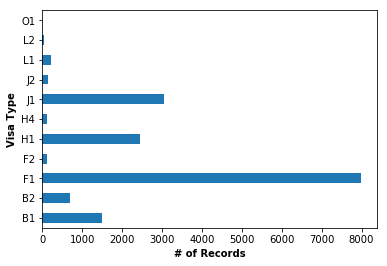

In [22]:
# Group data by Visa Type
vt = df.groupby('visaType')

# Get waiting days data
wd = vt['waitDays']

# Summarize Data
#wd.count()

ax1 = wd.count().plot(kind='barh')
plt.xlabel('# of Records',fontweight='bold')
plt.ylabel('Visa Type',fontweight='bold')

Facts based on population:
- F1 visa have most records ($n=7992$)
- J1 has the second largest records ($n=3039$), followed by H1 ($n=2454$)
- B1 and B2 together has $n=2189$ records.